Notebooks: 
[[1](IntroDS001.ipynb)]
[[2](IntroDS002.ipynb)]
[[3](IntroDS003.ipynb)]
[[4](IntroDS004.ipynb)]
[[5](IntroDS005.ipynb)]
[[6](IntroDS006.ipynb)]

Introduction to Data Science<br/>
[Oregon Curriculum Network](http://www.4dsolutions.net/ocn)

## COVID worksheet

References:

* [Learning pandas by Exploring COVID-19 Data
Posted by Matt Makai on March 28, 2020](https://www.fullstackpython.com/blog/learn-pandas-basic-commands-explore-covid-19-data.html)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
URL = "https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide"
csv_data = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"

In [5]:
df = pd.read_csv(csv_data, encoding="ISO-8859-1")

In [28]:
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,27/04/2020,27,4,2020,68,21,Afghanistan,AF,AFG,37172386.0,Asia
1,26/04/2020,26,4,2020,112,4,Afghanistan,AF,AFG,37172386.0,Asia
2,25/04/2020,25,4,2020,70,1,Afghanistan,AF,AFG,37172386.0,Asia
3,24/04/2020,24,4,2020,105,2,Afghanistan,AF,AFG,37172386.0,Asia
4,23/04/2020,23,4,2020,84,4,Afghanistan,AF,AFG,37172386.0,Asia
5,22/04/2020,22,4,2020,61,1,Afghanistan,AF,AFG,37172386.0,Asia
6,21/04/2020,21,4,2020,35,2,Afghanistan,AF,AFG,37172386.0,Asia
7,20/04/2020,20,4,2020,88,3,Afghanistan,AF,AFG,37172386.0,Asia
8,19/04/2020,19,4,2020,63,0,Afghanistan,AF,AFG,37172386.0,Asia
9,18/04/2020,18,4,2020,51,1,Afghanistan,AF,AFG,37172386.0,Asia


In [13]:
vn = df[df.countriesAndTerritories=="Vietnam"]

In [14]:
df.countriesAndTerritories.unique() #[-10:]

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba',
       'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Es

In [19]:
places = df[["countriesAndTerritories", "geoId", "countryterritoryCode", "popData2018"]]
places = places.drop_duplicates()
places.popData2018 = places.popData2018.astype('float').apply(lambda x: "{:,.0f}".format(x))
row = places.query("geoId == 'CN'")
row

,countriesAndTerritories,geoId,countryterritoryCode,popData2018
2627,China,CN,CHN,"1,392,730,000"


In [16]:
places.set_index("geoId", inplace=True)

In [20]:
places

,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,Afghanistan,AF,AFG,"37,172,386"
109,Albania,AL,ALB,"2,866,376"
159,Algeria,DZ,DZA,"42,228,429"
273,Andorra,AD,AND,"77,006"
318,Angola,AO,AGO,"30,809,762"
...,...,...,...,...
13205,Vietnam,VN,VNM,"95,540,395"
13320,Western_Sahara,EH,NaN,nan
13322,Yemen,YE,YEM,"28,498,687"
13340,Zambia,ZM,ZMB,"17,351,822"


In [21]:
def country_data(c):
    data = df[df.countriesAndTerritories==c][['dateRep','year','month', 'day','cases','deaths']]
    data.sort_values(['year','month', 'day'], inplace=True)
    data["total_cases"] = data.cases.cumsum()
    data["total_deaths"] = data.deaths.cumsum()
    return data

country1 = "Germany"
country2 = "United_States_of_America"
country3 = "China"
table1 = country_data(country1)
table2 = country_data(country2)
table3 = country_data(country3)

In [22]:
table2

,dateRep,year,month,day,cases,deaths,total_cases,total_deaths
13039,31/12/2019,2019,12,31,0,0,0,0
13038,01/01/2020,2020,1,1,0,0,0,0
13037,02/01/2020,2020,1,2,0,0,0,0
13036,03/01/2020,2020,1,3,0,0,0,0
13035,04/01/2020,2020,1,4,0,0,0,0
...,...,...,...,...,...,...,...,...
12925,23/04/2020,2020,4,23,17588,1721,842629,46784
12924,24/04/2020,2020,4,24,26543,3179,869172,49963
12923,25/04/2020,2020,4,25,21352,1054,890524,51017
12922,26/04/2020,2020,4,26,48529,2172,939053,53189


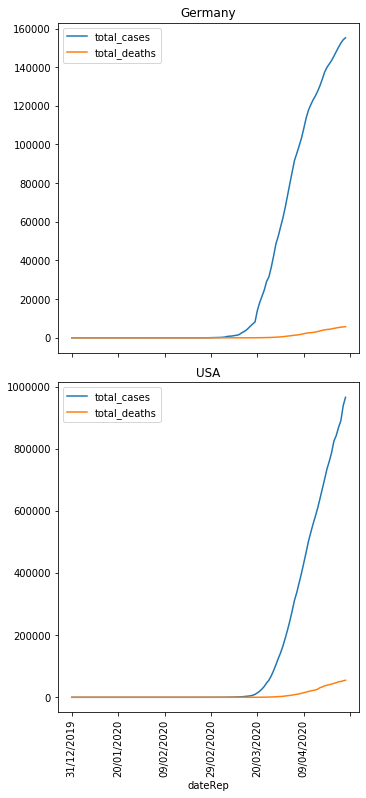

In [23]:
fig = plt.figure(figsize=(5, 11))
ax1 = plt.subplot('211')
table1.plot('dateRep',["total_cases","total_deaths"],ax=ax1, title="Germany")
ax2 = plt.subplot('212', sharex = ax1)
table2.plot('dateRep',["total_cases","total_deaths"],ax=ax2, title="USA")
plt.xticks(rotation=90)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show();

In [24]:
df[df.countriesAndTerritories=="China"].popData2018[0:1].astype('int')

2627    1392730000
Name: popData2018, dtype: int64

In [25]:
germany_pop = 83_783_942
usa_pop = 330_610_570
china_pop = 1_438_222_390 

In [26]:
def per_capita(table, pop):
    table['total_cases_per_capita']  = table.total_cases/germany_pop
    table['total_deaths_per_capita'] = table.total_deaths/germany_pop    
    return table

table1 = per_capita(table1, germany_pop)
table2 = per_capita(table2, usa_pop)
table3 = per_capita(table3, china_pop)

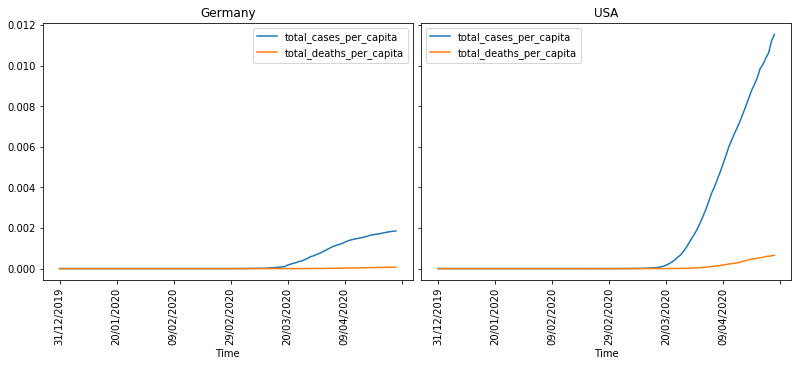

In [27]:
fig = plt.figure(figsize=(11, 5))
ax1 = plt.subplot('121')
table1.plot('dateRep',["total_cases_per_capita", "total_deaths_per_capita"], 
            ax=ax1, title="Germany")
plt.xticks(rotation=90)
plt.xlabel("Time")
ax2 = plt.subplot('122', sharey = ax1)
table2.plot('dateRep',["total_cases_per_capita", "total_deaths_per_capita"],
            ax=ax2, title="USA")
plt.xticks(rotation=90)
plt.xlabel("Time")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show();

In [ ]:
fig = plt.figure(figsize=(11, 5))
ax1 = plt.subplot('121')
table3.plot('dateRep',["total_cases_per_capita", "total_deaths_per_capita"], 
            ax=ax1, title="China")
plt.xticks(rotation=90)
plt.xlabel("Time")
plt.ylabel("Per Capita")

ax2 = plt.subplot('122', sharey = ax1)
table2.plot('dateRep',["total_cases_per_capita", "total_deaths_per_capita"],
            ax=ax2, title="USA")
plt.xticks(rotation=90)
plt.xlabel("Time")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show();

In [ ]:
fig = plt.figure(figsize=(5, 11))
ax1 = plt.subplot('211')
table3.plot('dateRep',["total_cases","total_deaths"],ax=ax1, title="China")
ax2 = plt.subplot('212', sharex = ax1)
table2.plot('dateRep',["total_cases","total_deaths"],ax=ax2, title="USA")
plt.xticks(rotation=90)
plt.xlabel("Time")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show();

In [ ]:
SlicedDataframesDict = dict(list(df.groupby('geoId')))

In [ ]:
SlicedDataframesDict['US']

# pandas playground...

Create a stash of Notebooks that help you remember the formulas and techniques you may need again. Having a scrap book of favorite specimens, that you've pondered and documented, is not to the exclusion of having favorite "go to" references online.

Lets remember what ```np.random.choice``` will do for us.  It's more powerful than the Standard Library ```random.choice``` in that it will let us specify how many choices, from what range, whether to allow replacement, and even what probability function to use.

In [ ]:
import numpy as np
buncha_data = np.random.choice(a=100, size=26, replace=True)
# ? np.random.choice

In [ ]:
dice_rolls = np.random.choice(range(1,7), size=30)
dice_rolls

In [ ]:
alphabet = sorted(list(set("A quick brown fox jumps over the lazy dog".upper().replace(" ",""))))
"".join(alphabet)

In [ ]:
lucky_26 = pd.DataFrame({"Contest": buncha_data}, index=alphabet)
lucky_26

In [ ]:
mu = lucky_26.mean()
mu

In [ ]:
def average(s, av):
    return (s - av)**2

lucky_26.Contest.apply(average, args=[mu]).sum()/(len(lucky_26))

In [ ]:
# ? lucky_26.var

```
Signature:
 lucky_26.var(
    axis=None,
    skipna=None,
    level=None,
    ddof=1,
    numeric_only=None,
    **kwargs,
)

Return unbiased variance over requested axis.

Normalized by N-1 by default. This can be changed using the ddof argument
```

In [ ]:
lucky_26.var(ddof=0)**(1/2)

In [ ]:
lucky_26.std(ddof=0)

In [ ]:
mydata = ["_has", "nope", "yes_", "no", "under_score"]
df = pd.DataFrame({"Col1": mydata})
df

In [ ]:
df.Col1.apply(lambda x: "_" in x)

In [ ]:
df[df.Col1.apply(lambda x: "_" in x)]

In [ ]:
df

In [ ]:
df[df.Col1.str.contains("_")]